# Using sparklyr in Databricks R Notebooks

In this notebook we show how you can use sparklyr in Databricks notebooks.

__NOTE__: You need a cluster running Apache Spark 2.2+ and Scala 2.11 to use sparklyr in Databricks.

## Installing sparklyr

We will be installing the latest version of sparklyr from [CRAN](https://cran.r-project.org/web/packages/sparklyr/index.html).
This might take couple minutes because it downloads and installs +10 dependencies.

You only need to do installation once on a cluster.
After installation, all other notebooks attached to that cluster can import and use sparklyr.

In [0]:
%r
# Installing latest version of Rcpp
install.packages("Rcpp") 

if (!require("sparklyr")) {
  install.packages("sparklyr")  
}

Installing package into ‘/databricks/spark/R/lib’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/Rcpp_0.12.19.tar.gz'
Content type 'application/x-gzip' length 3646456 bytes (3.5 MB)
==================================================
downloaded 3.5 MB

* installing *source* package ‘Rcpp’ ...
** package ‘Rcpp’ successfully unpacked and MD5 sums checked
** libs
g++ -I/usr/share/R/include -DNDEBUG -I../inst/include/ -fpic -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g -c Date.cpp -o Date.o
g++ -I/usr/share/R/include -DNDEBUG -I../inst/include/ -fpic -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g -c Module.cpp -o Module.o
g++ -I/usr/share/R/include -DNDEBUG -I../inst/include/ -fpic -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g -c Rcpp_init.cpp -o Rcpp_init.o
g++ -I/usr/share/R/include -DNDEBUG -I../inst/include/ -fpic -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g -c api.cpp -o api.o
g++ -I/usr/share/R/include -DNDEBUG -I../inst/include/ -fpic -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g -c attributes.cpp -o attributes.o
g++ -I/usr/share/R/include -DNDEBUG -I../inst/include/ -fpic -g -O2 -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g -c barrier.cpp -o barrier.o
g++ -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o Rcpp.so Date.o Module.o Rcpp_init.o api.o attributes.o barrier.o -L/usr/lib/R/lib -lR
installing to /databricks/spark/R/lib/Rcpp/libs
** R
** inst
** preparing package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded
* DONE (Rcpp)

The downloaded source packages are in
	‘/tmp/Rtmph2ZXW3/downloaded_packages’
Loading required package: sparklyr
Installing package into ‘/databricks/spark/R/lib’
(as ‘lib’ is unspecified)
also installing the dependencies ‘yaml’, ‘htmlwidgets’, ‘htmltools’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘base64enc’, ‘config’, ‘dbplyr’, ‘r2d3’, ‘rappdirs’, ‘shiny’, ‘forge’

trying URL 'https://cloud.r-project.org/src/contrib/yaml_2.2.0.tar.gz'
Content type 'application/x-gzip' length 89447 bytes (87 KB)
==================================================
downloaded 87 KB

trying URL 'https://cloud.r-project.org/src/contrib/htmlwidgets_1.3.tar.gz'
Content type 'application/x-gzip' length 866548 bytes (846 KB)
==================================================
downloaded 846 KB

trying URL 'https://cloud.r-project.org/src/contrib/htmltools_0.3.6.tar.gz'
Content type 'application/x-gzip' length 45408 bytes (44 KB)
==================================================
downloaded 44 KB

trying URL 'https://cloud.r-project.org/src/contrib/httpuv_1.4.5.tar.gz'
Content type 'application/x-gzip' length 1675895 bytes (1.6 MB)
==================================================
downloaded 1.6 MB

trying URL 'https://cloud.r-project.org/src/contrib/xtable_1.8-3.tar.gz'
Content type 'application/x-gzip' length 610140 bytes (595 KB)
==================================================
downloaded 595 KB

trying URL 'https://cloud.r-project.org/src/contrib/sourcetools_0.1.7.tar.gz'
Content type 'application/x-gzip' length 24155 bytes (23 KB)
==================================================
downloaded 23 KB

trying URL 'https://cloud.r-project.org/src/contrib/later_0.7.5.tar.gz'
Content type 'application/x-gzip' length 38900 bytes (37 KB)
==================================================
downloaded 37 KB

trying URL 'https://cloud.r-project.org/src/contrib/promises_1.0.1.tar.gz'
Content type 'application/x-gzip' length 106866 bytes (104 KB)
==================================================
downloaded 104 KB

trying URL 'https://cloud.r-project.org/src/

## Load sparklyr package

In [0]:
%r
library(sparklyr)

## Creating a sparklyr connection

You can use ``"databricks"`` as the connection method in ``spark_connect()`` to establish a sparklyr connection.
No additional parameters to ``spark_connect()`` are needed,
nor calling ``spark_install()`` is needed because Spark is already installed on a Databricks cluster.

Note that `sc` is a special name for sparklyr connection.
Using that variable name you will see Spark progress bars and built-in Spark UI viewers.

In [0]:
%r
sc <- spark_connect(method = "databricks")

## Using sparklyr and dplyr API

After setting up the sparklyr connection you can use all the sparklyr API.
You can import and combine sparklyr with dplyr or MLlib.
Note that if extension packages include third-party JARs you may need to install those JARs as libraries in your workspace.

In [0]:
%r
library(dplyr)

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

 filter, lag

The following objects are masked from ‘package:base’:

 intersect, setdiff, setequal, union

In [0]:
%r
iris_tbl <- copy_to(sc, iris)

In [0]:
%r
src_tbls(sc)

[1] "adult" "diamonds" "example_view" "iris" "one_users"

In [0]:
%r
iris_tbl %>% count

# Source: spark<?> [?? x 1]
 n
* 
1 150.

### More complex aggregation and visualization

In [0]:
%r
# Changing default plot height 
options(repr.plot.height = 600)

In [0]:
%r
iris_summary <- iris_tbl %>% 
  mutate(Sepal_Width = ROUND(Sepal_Width * 2) / 2) %>% # Bucketizing Sepal_Width
  group_by(Species, Sepal_Width) %>% 
  summarize(count = n(), Sepal_Length = mean(Sepal_Length), stdev = sd(Sepal_Length)) %>% collect

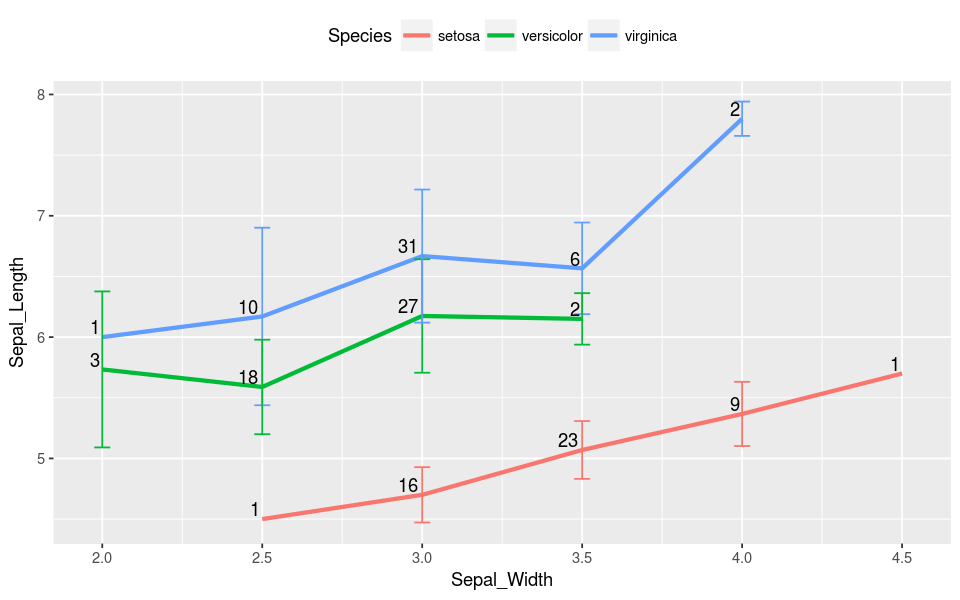

In [0]:
%r
library(ggplot2)

ggplot(iris_summary, aes(Sepal_Width, Sepal_Length, color = Species)) + 
  geom_line(size = 1.2) +
  geom_errorbar(aes(ymin = Sepal_Length - stdev, ymax = Sepal_Length + stdev), width = 0.05) +
  geom_text(aes(label = count), vjust = -0.2, hjust = 1.2, color = "black") +
  theme(legend.position="top")